In [36]:
import networkx as nx
import os
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import datetime
import pytz
import matplotlib.pyplot as plt
import preprocessing as prep

In [2]:
%matplotlib inline

In [5]:
graph_files = os.listdir("networks-hours/")

In [6]:
graph_files

['2015-08-21T03:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T20:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T09:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T05:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T23:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T16:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T19:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T07:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T08:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T21:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T00:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T22:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T17:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T12:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graphml',
 '2015-08-21T04:00:00Z_1h_allCams_0.99conf_160dist_6ilen.graph

In [8]:
graph_list = []

for eg in graph_files:
    G = nx.read_graphml("networks-hours/"+eg)
    date = eg.split("_")[0]
    date_dt = datetime.datetime.strptime(date, "%Y-%m-%dT%H:%M:%SZ").replace(tzinfo=pytz.UTC)
    date_ts = date_dt.timestamp()
    graph_list.append((date_dt,G))

In [23]:
len(graph_list[0][1].edges())

6492

In [43]:
stat = []

for date,g in graph_list:
    s = prep.network_statistics(g)
    s.update({"date": date})
    stat.append(s)

In [44]:
df3 = DataFrame(stat)

In [45]:
df3.set_index("date", inplace=True)

In [46]:
df3.head()

,av_deg,av_shortest_path,cc,components,degree,density,diameter,edges,nodes
date,,,,,,,,,
2015-08-21 03:00:00+00:00,17.243028,2.856694,0.149233,1,"(27, 25, 2, 8, 1, 10, 20, 9, 11, 2, 20, 16, 1,...",0.022930,6,6492,753
2015-08-21 20:00:00+00:00,13.498701,3.141459,0.144851,1,"(42, 25, 2, 16, 10, 36, 2, 19, 2, 59, 30, 15, ...",0.017554,8,5197,770
2015-08-21 09:00:00+00:00,28.832101,2.536134,0.142470,1,"(52, 21, 14, 36, 40, 14, 41, 5, 7, 31, 35, 36,...",0.030478,6,13652,947
2015-08-21 05:00:00+00:00,16.730238,2.925596,0.162402,2,"(45, 35, 20, 13, 37, 5, 2, 19, 23, 10, 7, 4, 7...",0.021018,7,6667,797
2015-08-21 23:00:00+00:00,14.466146,3.095757,0.138933,3,"(11, 27, 2, 19, 12, 18, 16, 3, 23, 2, 1, 6, 22...",0.018861,9,5555,768


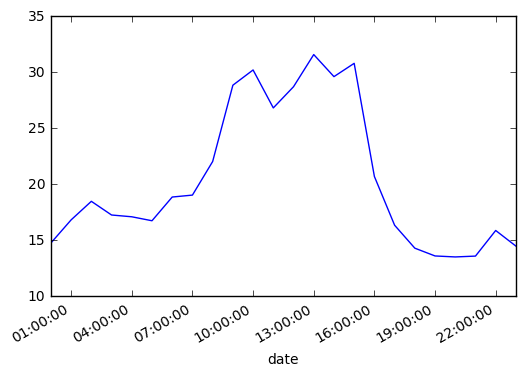

In [47]:
df3.av_deg.plot()

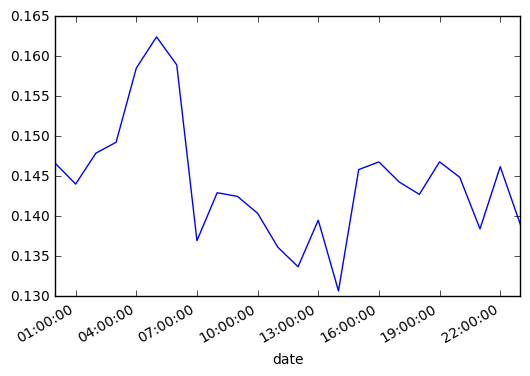

In [48]:
df3.cc.plot()

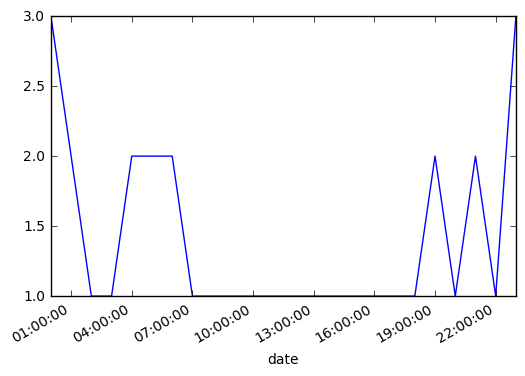

In [49]:
df3.components.plot()

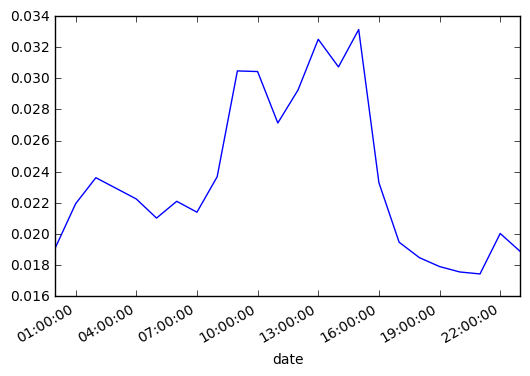

In [50]:
df3.density.plot()

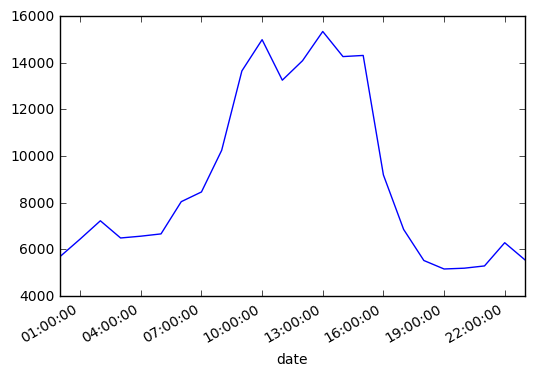

In [51]:
df3.edges.plot()

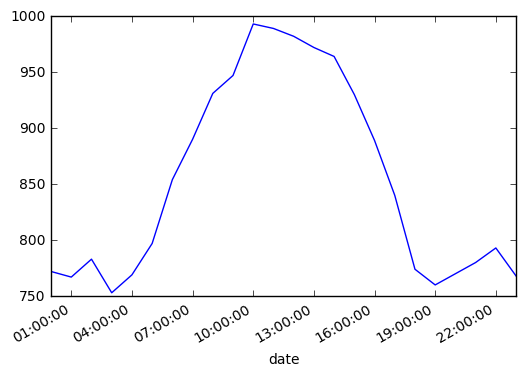

In [52]:
df3.nodes.plot()

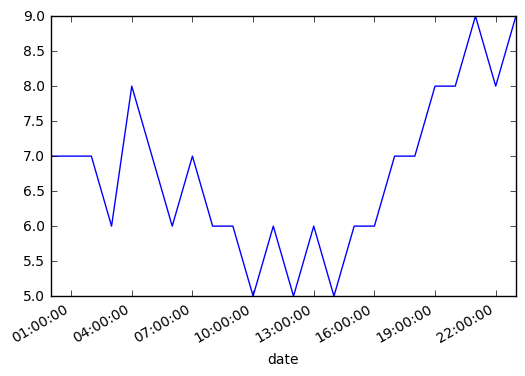

In [53]:
df3.diameter.plot()

# Tagesnetzwerke

In [60]:
def getGraphs(path):
    graph_files = os.listdir(path)
    
    graph_list = []

    for eg in graph_files:
        G = nx.read_graphml(path+eg)
        date = eg.split("_")[0]
        date_dt = datetime.datetime.strptime(date, "%Y-%m-%dT%H:%M:%SZ").replace(tzinfo=pytz.UTC)
        date_ts = date_dt.timestamp()
        graph_list.append((date_dt,G))
    
    return graph_list

In [61]:
path = "networks-days/"

In [62]:
l = getGraphs(path)

In [67]:
stat_days = []

for date,g in l:
    s = prep.network_statistics(g)
    s.update({"date": date})
    stat_days.append(s)

In [68]:
df = DataFrame(stat_days)

In [69]:
df.set_index("date", inplace=True)

In [74]:
df.head()

,av_deg,av_shortest_path,cc,components,degree,density,diameter,edges,nodes
date,,,,,,,,,
2015-08-25 00:00:00+00:00,235.742832,2.061867,0.507023,1,"(2, 546, 326, 159, 391, 215, 1, 416, 351, 366,...",0.204994,5,135670,1151
2015-08-24 00:00:00+00:00,262.204586,2.004843,0.500268,1,"(370, 447, 1, 403, 1, 182, 2, 3, 351, 333, 459...",0.231425,5,148670,1134
2015-08-22 00:00:00+00:00,259.120135,1.975185,0.432432,1,"(452, 5, 1, 292, 215, 261, 2, 355, 314, 1, 42,...",0.219407,4,153140,1182
2015-08-21 00:00:00+00:00,253.658902,1.942005,0.401515,1,"(492, 7, 212, 322, 2, 247, 417, 283, 461, 442,...",0.211206,5,152449,1202
2015-08-23 00:00:00+00:00,277.852814,1.968653,0.484384,1,"(440, 518, 344, 382, 227, 2, 322, 375, 327, 40...",0.240774,4,160460,1155


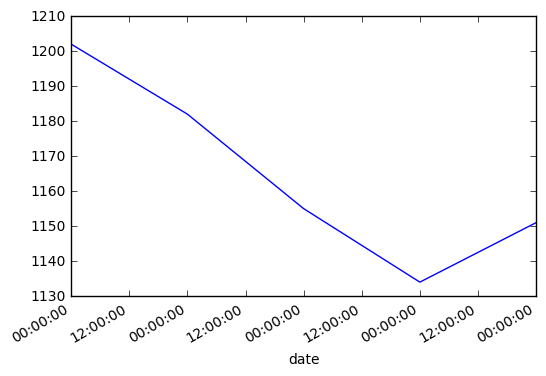

In [80]:
df.nodes.plot()